# Clasificación de la flor del iris

## Datos (Iris) — resumen
- 3 clases: setosa, versicolor, virginica (50 muestras por clase, total 150).
- 4 características (cm): largo/ancho de sépalos y pétalos.
- Fuente clásica: Fisher (1936). Útil para clasificación multiclase básica.

<p align="center">
  <img src="https://miguelevangelista.gitbook.io/notas-de-redes-neuronales/~gitbook/image?url=https%3A%2F%2F687703078-files.gitbook.io%2F~%2Ffiles%2Fv0%2Fb%2Fgitbook-x-prod.appspot.com%2Fo%2Fspaces%252FeF6IdxtFXi8E1jDQ4vyx%252Fuploads%252FlCjyiLP7tXdELIpxsDPt%252Fdownload%2520%282%29.png%3Falt%3Dmedia%26token%3Dae6c5fc6-fde8-4ae9-bb2f-de27cddacc46&width=768&dpr=1&quality=100&sign=1d9f1cc3&sv=2" width="350">
</p>

Cargamos el dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()


Estructura de iris (sklearn): es un diccionario. Se revisan sus llaves para ubicar datos y metadatos útiles (por ejemplo, 'DESCR').

In [2]:
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Llave 'DESCR': contiene una descripción del dataset (útil para contexto, fuentes y atributos).

In [3]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Exploración rápida de llaves útiles:
- 'target_names': nombres de clases.
- 'target': etiquetas (0, 1, 2).
- 'data': matriz de características (150x4).
- 'feature_names': nombres de las 4 características.

In [4]:
iris.target_names
iris.target
iris.data
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

DataFrame en pandas: se cargan las 4 características en un DataFrame para exploración rápida y modelado.

In [5]:
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Etiquetas (mapa rápido):
- 0 → setosa
- 1 → versicolor
- 2 → virginica

Descripción estadística (para chequear rangos y escalas):

In [6]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Preprocesamiento (rápido)
- X: las 4 características del DataFrame.
- y: etiquetas en one-hot (3 columnas).

In [7]:
X = iris_df
y = pd.get_dummies(iris.target).values


Split train/test:
- 80% entrenamiento, 20% prueba (random_state=42 para reproducibilidad).

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


Tamaños de los conjuntos (verificación rápida):

In [9]:
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


Escalado de características:
- StandardScaler: media 0 y desviación estándar 1 (mejora la optimización con MLP).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Alternativa: MinMaxScaler (escala a [0, 1]; útil si se desea mantener rangos acotados).

## Red neuronal multicapa (MLP)
- Arquitectura simple para clasificación multiclase.
- Capas densas con ReLU y salida softmax (3 clases).

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])


/home/nictez/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-03 19:09:32.208372: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Notas del modelo:
- Definición con `Sequential` para encadenar capas.
- Capas `Dense` con ReLU capturan relaciones no lineales.
- Salida `softmax` (3 neuronas) para probabilidades por clase.

## Compilación (rápida)
- Optimizador: Adam (lr=0.001).
- Pérdida: `categorical_crossentropy` (multiclase con one-hot).
- Métrica: `accuracy`.
Nota: se puede pasar `'adam'` directamente a `compile` si no se requiere configurar el lr manualmente.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Recordatorio de compilación:
- Adam (lr=0.001), pérdida `categorical_crossentropy`, métrica `accuracy`.
- Alternativa rápida: pasar `'adam'` directamente a `compile` si no se necesita ajustar lr.

## Entrenamiento

In [14]:
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.7020 - val_accuracy: 0.9000 - val_loss: 0.3927
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.3837 - val_accuracy: 0.9333 - val_loss: 0.2460
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.2946 - val_accuracy: 0.9333 - val_loss: 0.1788
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.2347 - val_accuracy: 0.9667 - val_loss: 0.1401
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1864 - val_accuracy: 0.9667 - val_loss: 0.1225
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1502 - val_accuracy: 0.9667 - val_loss: 0.1253
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1284 - val_accuracy: 1.0000 - val_loss: 0.0729
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1070 - val_accuracy: 1.

Ajustes de entrenamiento (qué mirar):
- `epochs=10`, `batch_size=1`, `validation_data=(X_test, y_test)`.
- Objetivo: reducir `loss` y mejorar `val_loss/accuracy` sin sobreajuste.

## Curva de pérdida

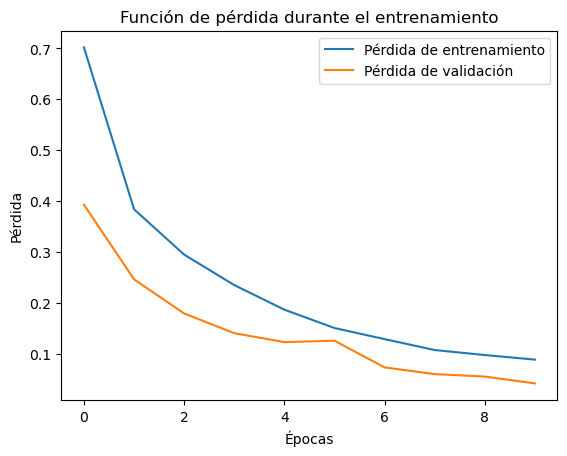

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


Lectura rápida:
- La pérdida de entrenamiento debería disminuir.
- Si `val_loss` se separa y sube mientras `loss` baja → posible sobreajuste.
- Si ambas pérdidas son altas → falta de capacidad o más entrenamiento/escalado/ajuste de lr.

## Evaluación
- Se reportan `loss` y `accuracy` sobre el conjunto de prueba.
- Objetivo: buena `accuracy` con `loss` razonablemente baja (coherente con las curvas de entrenamiento).

In [16]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 1.0000 - loss: 0.0413
Loss: 0.041321516036987305, Accuracy: 1.0


Se evalúa el rendimiento del modelo en el conjunto de prueba utilizando evaluate. Se obtienen la pérdida y la precisión del modelo en los datos de prueba.

## Predicción
- `predict` devuelve probabilidades por clase.
- `argmax` convierte a clase predicha.
- Se compara con las clases reales y se arma un DataFrame para inspección rápida.

In [18]:
import numpy as np

predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor
